## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
from PIL import Image
from collections import Counter
from tqdm import tqdm
import random
!pip install pillow_heif
from pillow_heif import register_heif_opener

# Register the HEIF opener
register_heif_opener()

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import cv2
from google.colab.patches import cv2_imshow
!pip install rembg
from rembg import remove

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (300, 300)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        im = Image.open(fp, 'r')
        # covert image to a matrix
        img_ts = np.array(im)
        img_ts = img_ts.astype(np.float32) / 255
        try:
            # concatenate different images
            full_mat = full_mat + [img_ts]
        except UnboundLocalError:
            # if not assigned yet, assign one
            full_mat = [img_ts]
    return full_mat

In [ ]:
## iterate through folders

trashbox_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_dataset_subfolders/'
output_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/rm/'

# Function to create directories recursively
def create_dirs(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# Iterate through the directories
for root, dirs, files in os.walk(trashbox_path):
    for file in files:
        if file.endswith(".jpg"):
            # Construct paths
            input_path = os.path.join(root, file)
            output_dir = os.path.join(output_path, os.path.relpath(root, trashbox_path))
            output_path_file = os.path.join(output_dir, file).replace('.jpg', '.png')

            # Create output directory if it doesn't exist
            create_dirs(output_dir)

            if not os.path.exists(output_path_file):
                # Load input image and remove background
                input_image = Image.open(input_path).convert("RGB")  # Convert to RGB mode
                output_image = remove(input_image)

                # Convert PIL image to numpy array
                output_image_np = cv2.cvtColor(np.array(output_image), cv2.COLOR_RGB2BGR)

                # Save the output image
                cv2.imwrite(output_path_file, output_image_np)
                print(f"Processed and saved: {output_path_file}")
            else:
                print(f"Skipped existing file: {output_path_file}")

print("Images processed and saved successfully.")

Streaming output truncated to the last 5000 lines.
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 1129.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 1528.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 135.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 1364.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 141.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 1835.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 1843.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 1422.png
Skipped existing file: /content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard/cardboard 1658.png
Skipped existing file: /content/drive/MyDr

KeyboardInterrupt: 

In [ ]:
## check total number of images in rm

# run it on our folders
# trashbox_path = 'TrashBox/TrashBox/TrashBox_train_dataset_subfolders/'
rm_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/rm/'
total_images = 0

# Iterate through the directories
for root, dirs, files in os.walk(rm_path):
    for file in files:
        if file.endswith(".png"):
            total_images += 1

print("Total number of images:", total_images)

Total number of images: 14263


(0,) (0,)


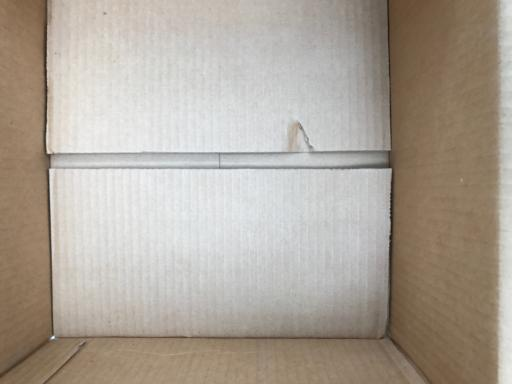

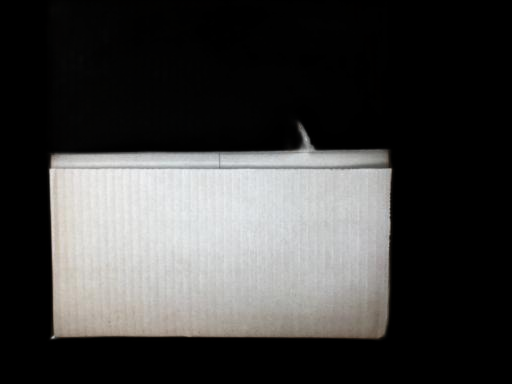

In [ ]:
input_path = "/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_dataset_subfolders/cardboard/cardboard 2413.jpg"
output_path = "/content/drive/MyDrive/MIDS_Capstone/Datasets/rm/cardboard2413.png"



input = cv2.imread(input_path)

cv2_imshow(input)

cv2.waitKey(0)  # Wait indefinitely for a key press
cv2.destroyAllWindows()

output = remove(input)
cv2.imwrite(output_path, output)


##
output_im = cv2.imread(output_path)

cv2_imshow(output_im)


## TrashBox

In [ ]:
# run it on our folders
trashbox_cardboard_path = "/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_dataset_subfolders/cardboard/"
trashbox_cardboard_images = img2np(path = trashbox_cardboard_path, list_of_filename = os.listdir(trashbox_cardboard_path[:21]))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDriv'

In [ ]:
print('Number of Cardboard Images: ', len(os.listdir(trashbox_cardboard_path)))

In [ ]:
# for i in range(len(trashbox_cardboard_path)):
#   fig0 = plt.figure()
#   plt.imshow(trashbox_cardboard_images[i], interpolation='nearest', aspect='auto')
#   plt.xticks(ticks=[])
#   plt.yticks(ticks=[])
#   plt.show()

_, axs = plt.subplots(np.ceil(len(trashbox_cardboard_images)/10), 10, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(trashbox_cardboard_images, axs):
  ax.imshow(img)
  plt.show()

ValueError: Number of rows must be a positive integer, not 1.0

<Figure size 1200x1200 with 0 Axes>

In [ ]:
# EDA ideas
# Count how many images in each category of each dataset (Class imbalances)
# Size of different images (do we need to resize in cleaning)
# Aspect ratio of different images (proportional ratio of width to height)

In [ ]:
notebook_path = os.getcwd()
print(notebook_path)

/content


## Drinking Waste Classification

In [ ]:
# dataset info
def load_dataset_no_features(data_dir, cl_limit=7, img_limit=220):
    X = []
    Y = []
    idx_to_cl = {}

    for i, cl in enumerate(os.listdir(data_dir)):
        if i >= cl_limit:
            break

        print(cl)
        idx_to_cl[i] = cl
        for j, fname in tqdm(enumerate(os.listdir(os.path.join(data_dir,cl)))):
            if j >= img_limit:
                break

            img = cv2.imread(os.path.join(data_dir, cl, fname))
            X.append(img)
            Y.append(i)

    return np.array(X), np.array(Y), idx_to_cl

def apply_features(X, feature_functions={}):
    features = []
    features_idxs = {}
    for img in tqdm(X):
        feature = np.array([])
        for function_name in feature_functions.keys():
            start = len(feature)
            feature = np.append(feature, feature_functions[function_name](img))
            features_idxs[function_name] = (start, len(feature) - 1)
        features.append(feature)
    return np.array(features), features_idxs




In [ ]:
# call load_dataset_no_features to get entire X, Y
# then we do train_test_split to get X_train, X_test, Y_train, Y_test
# finally, apply features to X_train only

X, Y, idx_to_cl = load_dataset_no_features('data') # load
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True, random_state=42) # train test split at 80-20 ratio


NameError: name 'os' is not defined

In [ ]:
# find # of files

drinkingwaste_path = '/content/drive/MyDrive/MIDS Capstone/Datasets/rawimgs/'
drinkingwaste_folders = os.listdir(drinkingwaste_path)
if '.DS_Store' in drinkingwaste_folders:
    drinkingwaste_folders.remove('.DS_Store')

df_dw = pd.DataFrame(columns = drinkingwaste_folders)

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    print(f)
    files_in_folder = os.listdir(folder_path)
    num_files = len(files_in_folder)

    df_dw.loc[0, f] = num_files


print(df_dw)


#dringkingwaste_pet_images = img2np(path = drinkingwaste_pet_path, list_of_filename = os.listdir(drinkingwaste_pet_path))

NameError: name 'os' is not defined

0 1508
1 1232
2 1028
3 1060


<ipython-input-10-9a031258b264>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (folder, value) in enumerate(df_dw.sum().iteritems()):


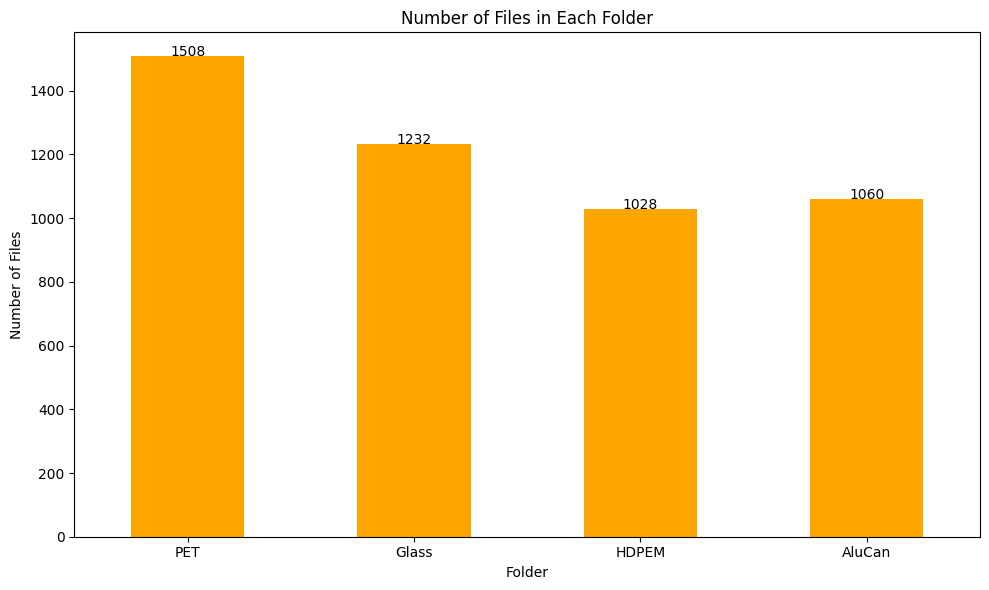

In [ ]:
# plot # of files

plt.figure(figsize=(10, 6))
df_dw.sum().plot(kind='bar', color='orange')
plt.title('Number of Files in Each Folder')
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

for i, (folder, value) in enumerate(df_dw.sum().iteritems()):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find format of images

ff_list = []

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)

        root, extension = os.path.splitext(full_path)

        # Extract the file format (extension)
        file_format = extension[1:]  # Remove the leading dot

        ff_list.append(file_format)

ff_list = [s.upper() for s in ff_list]

counter = Counter(ff_list)

ff_sum = [(item, count) for item, count in counter.items()]
df_ff_sum = pd.DataFrame(ff_sum, columns=['Value', 'Frequency'])


print(df_ff_sum)

  Value  Frequency
0   JPG       4820
1  HEIC          8


0 4820
1 8


<Figure size 1000x600 with 0 Axes>

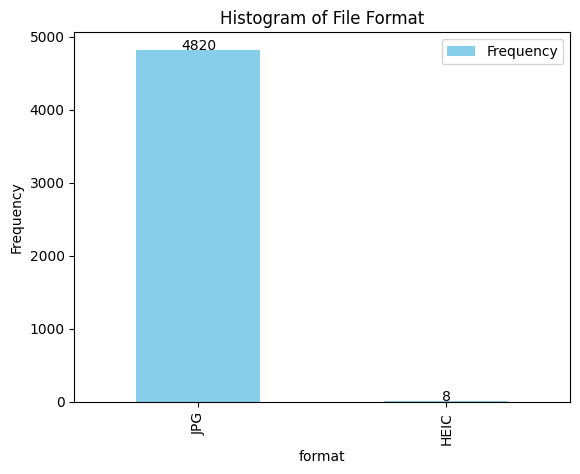

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_ff_sum.plot(x='Value', y='Frequency', kind='bar', color='skyblue')
plt.title('Histogram of File Format')
plt.xlabel('format')
plt.ylabel('Frequency')

for i, value in enumerate(df_ff_sum['Frequency']):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find shape of images

imgshape_list = []

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)
        im = Image.open(full_path, 'r')

        image_size = str(im.size[0])+ 'x' + str(im.size[1])
        imgshape_list.append(image_size)
        #print(image_size)

counter = Counter(imgshape_list)
is_sum = [(item, count) for item, count in counter.items()]

df_is_sum = pd.DataFrame(is_sum, columns=['Value', 'Frequency'])


       Value  Frequency
0    384x512        389
1    512x683       3665
2    512x384        764
3  4032x3024          1
4  3024x4032          8
5    505x634          1


<Figure size 1000x600 with 0 Axes>

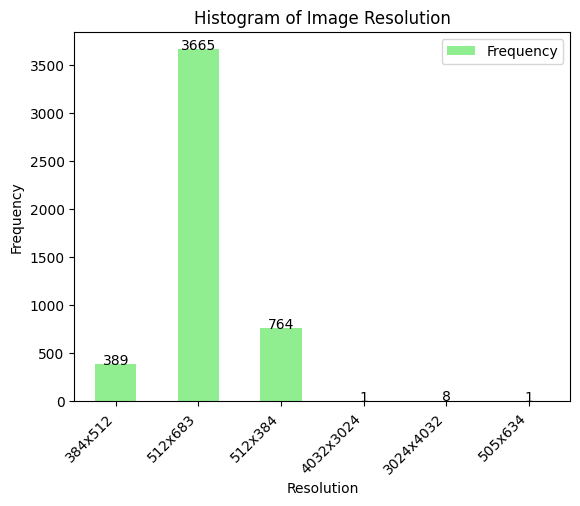

In [ ]:
# plot shape of images

print(df_is_sum)

plt.figure(figsize=(10, 6))
df_is_sum.plot(x='Value', y='Frequency', kind='bar', color='lightgreen')
plt.title('Histogram of Image Resolution')
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(df_is_sum['Frequency']):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
## Get images and limit to 25

def load_dataset(data_dir, limit_to=25):
    """
    Load image data set given a path.
    limit_to: limits the number of examples per class to this value.
    """
    data = {}
    for cl in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, cl)
        if not os.path.isdir(class_dir):  # Skip if not a directory
            continue
        print(cl)
        data[cl] = []
        counter = 0
        for fname in tqdm(os.listdir(class_dir)):
            if counter > limit_to - 1:
                break
            data[cl].append(plt.imread(os.path.join(data_dir, cl, fname)))
            counter += 1
    return data

#load_dataset(drinkingwaste_path, limit_to=25)
#get_random_pics_by_class(drinkingwaste_path)

PET


  2%|▏         | 25/1508 [00:25<25:24,  1.03s/it]  


Glass


  2%|▏         | 25/1232 [00:12<09:42,  2.07it/s]


HDPEM


  2%|▏         | 25/1028 [00:07<05:12,  3.21it/s]


AluCan


  2%|▏         | 25/1060 [00:08<05:36,  3.08it/s]


{'PET': [array([[[164, 125,  86],
          [154, 115,  76],
          [147, 107,  71],
          ...,
          [158, 122,  96],
          [155, 121,  93],
          [164, 130, 102]],
  
         [[167, 128,  89],
          [158, 119,  80],
          [150, 110,  74],
          ...,
          [138, 106,  83],
          [145, 113,  88],
          [147, 115,  90]],
  
         [[165, 125,  89],
          [154, 114,  78],
          [143, 103,  67],
          ...,
          [146, 117, 101],
          [143, 114,  96],
          [140, 113,  94]],
  
         ...,
  
         [[118, 103,  72],
          [149, 134, 103],
          [130, 113,  83],
          ...,
          [179, 140, 123],
          [190, 149, 131],
          [164, 123, 105]],
  
         [[125, 110,  81],
          [114,  99,  70],
          [100,  83,  53],
          ...,
          [190, 151, 134],
          [186, 145, 127],
          [188, 147, 129]],
  
         [[125, 110,  81],
          [ 98,  83,  54],
          [ 81,  

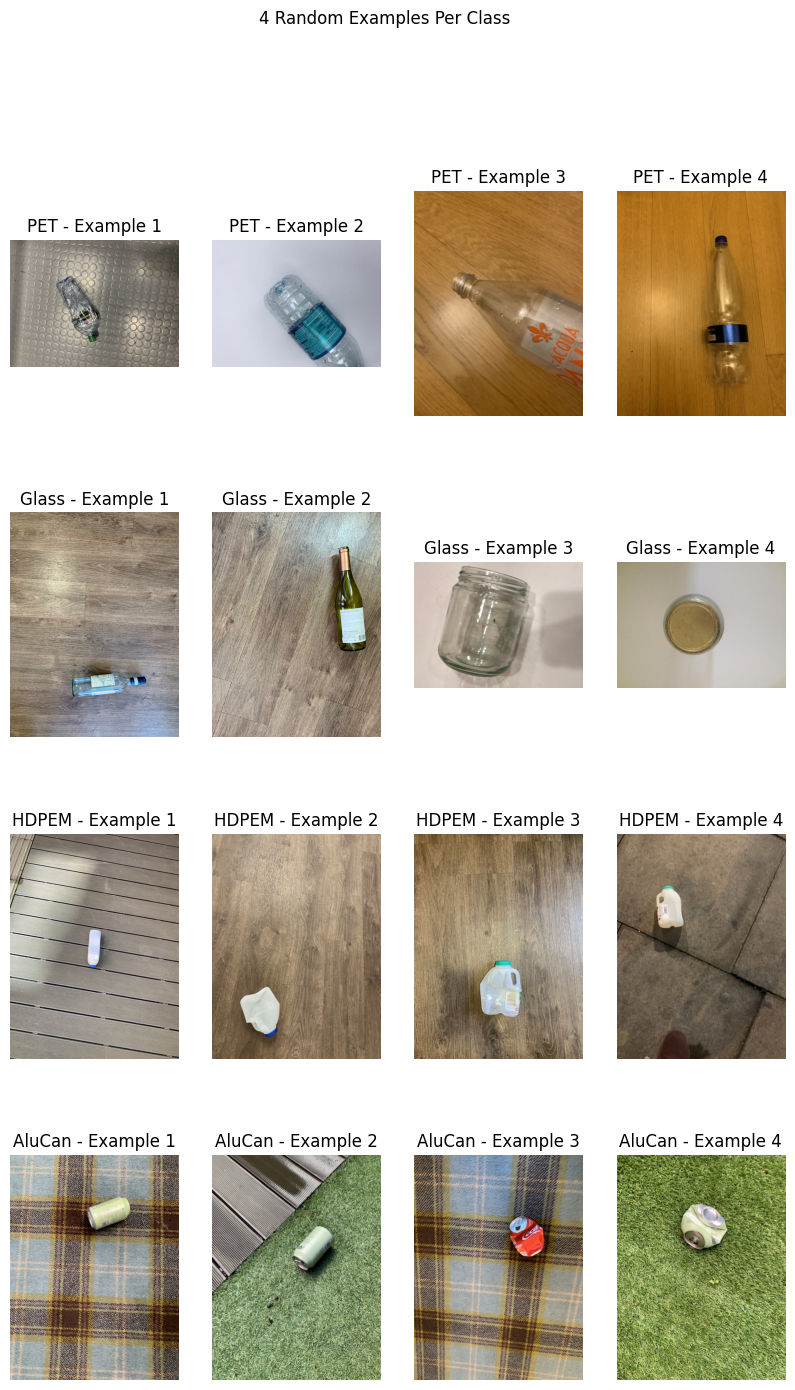

In [ ]:
def get_random_pics_by_class(data_dir, num_examples = 3):
    """
    Get a random example image per class and display given a path.
    """
    random.seed(1234)
    dict_imgs = {}
    for cl in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, cl)

        if not os.path.isdir(class_dir):  # Skip if not a directory
            continue

        dict_imgs[cl] = []
        files = os.listdir(class_dir)
        # Ensure we have enough files to choose from
        num_files = min(len(files), num_examples)
        chosen_files = random.sample(files, num_files)

        for f in chosen_files:
            dict_imgs[cl].append(plt.imread(os.path.join(class_dir, f)))

    num_classes = len(dict_imgs.keys())
    fig, axes = plt.subplots(nrows=num_classes, ncols=num_examples, figsize=(10, num_classes * num_examples))
    for i, cl in enumerate(dict_imgs.keys()):
        for j in range(num_examples):
            axes[i, j].imshow(dict_imgs[cl][j])
            axes[i, j].axis("off")
            axes[i, j].set_title(f"{cl} - Example {j+1}")
    plt.suptitle(f"{num_examples} Random Examples Per Class")
    plt.show()

get_random_pics_by_class(drinkingwaste_path, num_examples = 4)

#### Change resolution

Renamed 'Glass' to 'Glass'


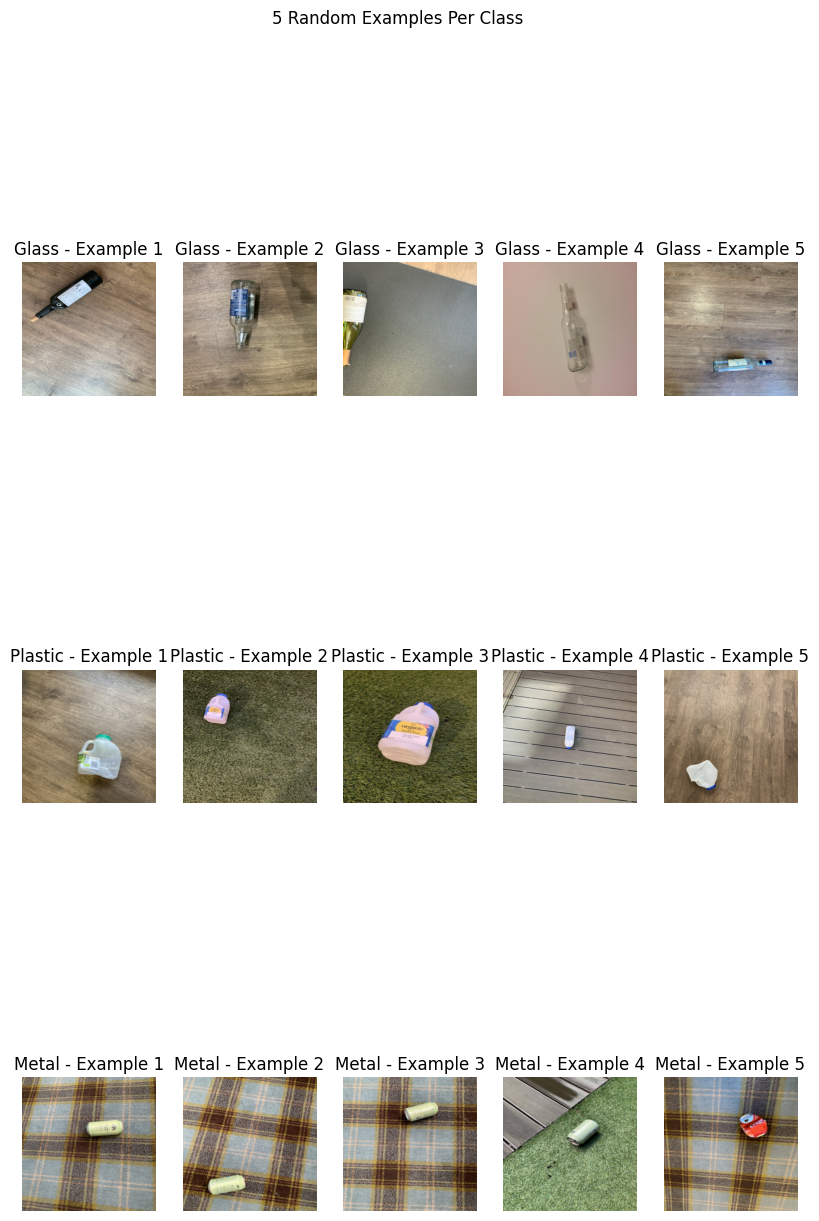

In [ ]:
def get_random_pics_by_class(data_dir, num_examples = 3):
    """
    Get a random example image per class and display given a path.
    """
    random.seed(1234)
    new_width = 224
    new_height = 224
    dict_imgs = {}
    class_mapping = {
        "HDPEM": "Plastic",
        "PET": "Plastic",
        "AluCan": "Metal",
        "Glass": "Glass"
    }

    for cl in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, cl)
        if os.path.isdir(class_dir):
            if cl in class_mapping:
                new_class_name = class_mapping[cl]
                os.rename(class_dir, os.path.join(data_dir, new_class_name))
                print(f"Renamed '{cl}' to '{new_class_name}'")

            dict_imgs[cl] = []
            files = os.listdir(class_dir)
            # Ensure we have enough files to choose from
            num_files = min(len(files), num_examples)
            chosen_files = random.sample(files, num_files)

            for f in chosen_files:
                # Open the image using PIL
                image = Image.open(os.path.join(class_dir, f))
                # Resize the image
                resized_image = image.resize((new_width, new_height))
                dict_imgs[cl].append(resized_image)

    num_classes = len(dict_imgs.keys())
    fig, axes = plt.subplots(nrows=num_classes, ncols=num_examples, figsize=(10, num_classes * num_examples))
    for i, cl in enumerate(dict_imgs.keys()):
        for j in range(num_examples):
            axes[i, j].imshow(dict_imgs[cl][j])
            axes[i, j].axis("off")
            axes[i, j].set_title(f"{cl} - Example {j+1}")
    plt.suptitle(f"{num_examples} Random Examples Per Class")
    plt.show()

get_random_pics_by_class(drinkingwaste_path, num_examples = 5)


### Group the subclass

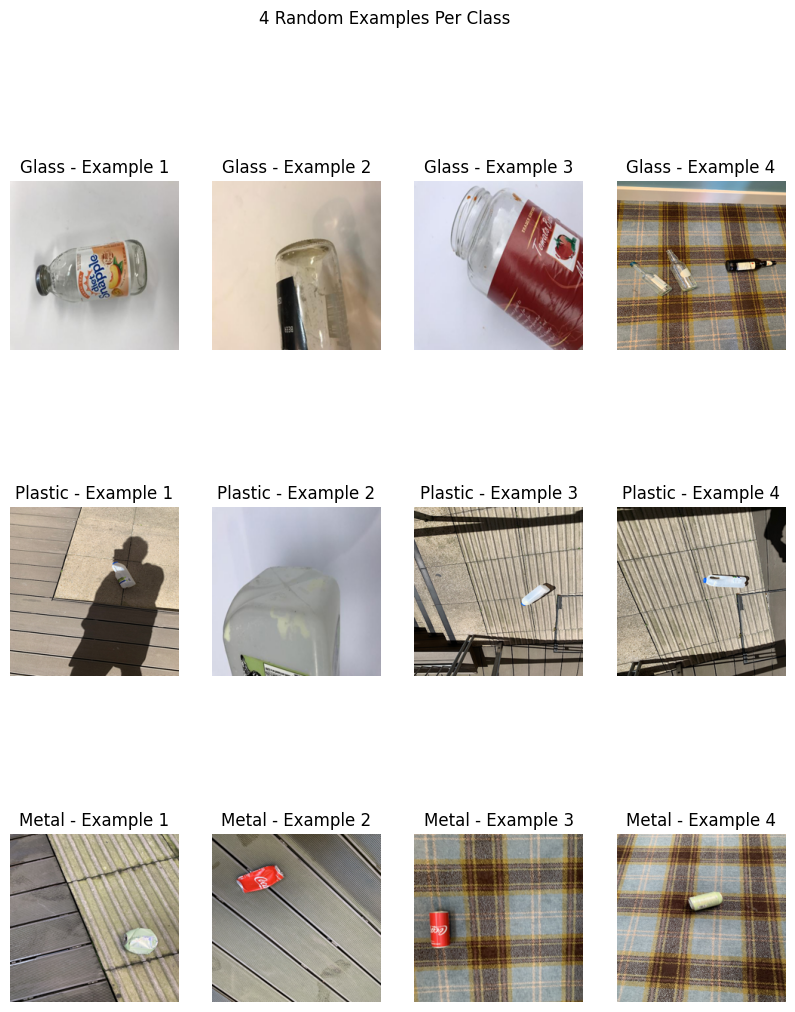

In [ ]:
def get_random_pics_by_class(data_dir, num_examples = 3):
    """
    Get a random example image per class and display given a path.
    """
    random.seed(1001)
    new_width = 224
    new_height = 224
    dict_imgs = {}

    class_mapping = {
        "HDPEM": "Plastic",
        "PET": "Plastic",
        "AluCan": "Metal",
        "Glass": "Glass"
    }

    for cl in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, cl)
        if not os.path.isdir(class_dir):  # Skip if not a directory
            continue

        dict_imgs[cl] = []
        files = os.listdir(class_dir)
        # Ensure we have enough files to choose from
        num_files = min(len(files), num_examples)
        chosen_files = random.sample(files, num_files)

        for f in chosen_files:
            # Open the image using PIL
            image = Image.open(os.path.join(class_dir, f))
            # Resize the image
            resized_image = image.resize((new_width, new_height))
            dict_imgs[cl].append(resized_image)

    num_classes = len(dict_imgs.keys())
    fig, axes = plt.subplots(nrows=num_classes, ncols=num_examples, figsize=(10, num_classes * num_examples))
    for i, cl in enumerate(dict_imgs.keys()):
        for j in range(num_examples):

            axes[i, j].imshow(dict_imgs[cl][j])
            axes[i, j].axis("off")
            axes[i, j].set_title(f"{cl} - Example {j+1}")
    plt.suptitle(f"{num_examples} Random Examples Per Class")
    plt.show()

get_random_pics_by_class(drinkingwaste_path, num_examples = 4)

In [ ]:
## trash box

trashbox_path = '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/'

trashbox_folders = os.listdir(trashbox_path)
if '.DS_Store' in trashbox_folders:
    trashbox_folders.remove('.DS_Store')

df_tb = pd.DataFrame(columns = trashbox_folders)

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    print(f)
    files_in_folder = os.listdir(folder_path)
    num_files = len(files_in_folder)

    df_tb.loc[0, f] = num_files


print(df_tb)

e-waste
paper
plastic
cardboard
glass
metal
medical
  e-waste paper plastic cardboard glass metal medical
0    2406  2156    2135      1930  2022  2068    1585


<ipython-input-143-c749abba988c>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (folder, value) in enumerate(df_tb.sum().iteritems()):


0 2406
1 2156
2 2135
3 1930
4 2022
5 2068
6 1585


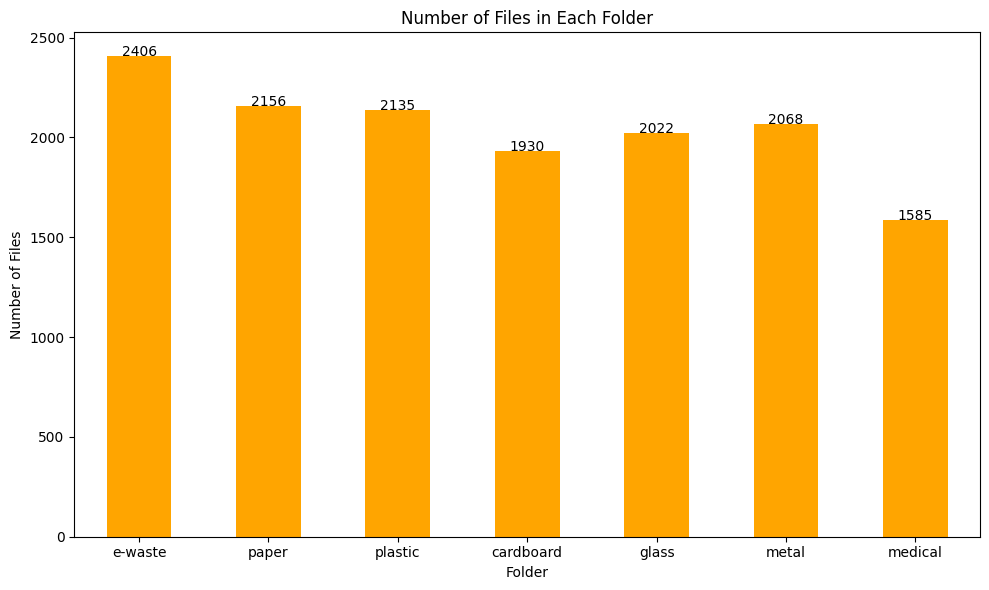

In [ ]:
plt.figure(figsize=(10, 6))
df_tb.sum().plot(kind='bar', color='orange')
plt.title('Number of Files in Each Folder')
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

for i, (folder, value) in enumerate(df_tb.sum().iteritems()):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find format of images

ff_list = []

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)

        root, extension = os.path.splitext(full_path)

        # Extract the file format (extension)
        file_format = extension[1:]  # Remove the leading dot

        ff_list.append(file_format)

ff_list = [s.upper() for s in ff_list]

counter = Counter(ff_list)

ff_sum = [(item, count) for item, count in counter.items()]
df_ff_sum = pd.DataFrame(ff_sum, columns=['Value', 'Frequency'])


print(df_ff_sum)

  Value  Frequency
0   JPG      14302


0 14302


<Figure size 1000x600 with 0 Axes>

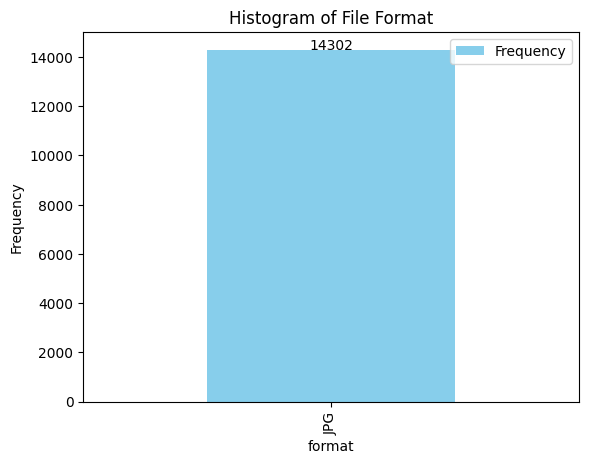

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_ff_sum.plot(x='Value', y='Frequency', kind='bar', color='skyblue')
plt.title('Histogram of File Format')
plt.xlabel('format')
plt.ylabel('Frequency')

for i, value in enumerate(df_ff_sum['Frequency']):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find shape of images

imgshape_list = []

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)
        im = Image.open(full_path, 'r')

        image_size = str(im.size[0])+ 'x' + str(im.size[1])
        imgshape_list.append(image_size)
        #print(image_size)

counter = Counter(imgshape_list)
is_sum = [(item, count) for item, count in counter.items()]

df_is_sum = pd.DataFrame(is_sum, columns=['Value', 'Frequency'])

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/paper/paper 2273.jpg'

In [ ]:
fp = '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/paper/paper 2273.jpg'

img = Image.open(fp)
img.show()


In [ ]:
# plot shape of images

print(df_is_sum)

plt.figure(figsize=(10, 6))
df_is_sum.plot(x='Value', y='Frequency', kind='bar', color='lightgreen')
plt.title('Histogram of Image Resolution')
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(df_is_sum['Frequency']):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()